In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [115]:
## Model structure
Mt = 40
Nt = 20

Ma = 20
Na = 3

Mm = 1
Nm = 1

## Model parameters

# Unisensory receptive fields
phit_0 = 1
sigmat_phi = 0.5
phia_0 = 1
sigmaa_phi = 10

# External stimuli
it_0 = 2.5
sigmat_i = 0.3
sigmat_v = 0.1
xt_0 = 10 
yt_0 = 5

ia_0 = 3.6
sigmaa_i = 0.3
sigmaa_v = 0.4
xa_0 = 20 # This parameter determines how far the sound is presented. 
ya_0 = 5


In [4]:
## Receptive fields

# Definition
xt = np.arange(1,Mt+1)*0.5
yt = np.arange(1,Nt+1)*0.5

xa = (np.arange(1,Ma+1)*10)-5
ya = (np.arange(1,Na+1)*10)-15
              
def phit(x,y):
    phi = np.zeros((Mt,Nt))
    for i in range(Mt):
        for j in range(Nt):
            phi[i][j] = phit_0*np.exp(-((np.square(xt[i]-x)+np.square(yt[j]-y))/(2*np.square(sigmat_phi))))
    return phi

def phia(x,y):
    phi = np.zeros((Ma,Na))
    for i in range(Ma):
        for j in range(Na):
            phi[i][j] = phia_0*np.exp(-((np.square(xa[i]-x)+np.square(ya[j]-y))/(2*np.square(sigmaa_phi))))
    return phi

# Calculation
d = 0.2
xi_t = np.arange(0,20+d,d)
yn_t = np.arange(0,10+d,d)

phi_t = np.zeros((Mt,Nt,len(yn_t),len(xi_t)))        
for k in range(len(xi_t)):
    for l in range(len(yn_t)):
        phi_t[:,:,l,k] = phit(xi_t[k],yn_t[l])
        
xi_a = np.arange(0,200+d,d)
yn_a = np.arange(0,30+d,d)

phi_a = np.zeros((Ma,Na,len(yn_a),len(xi_a)))        
for k in range(len(xi_a)):
    for l in range(len(yn_a)):
        phi_a[:,:,l,k] = phia(xi_a[k],yn_a[l])
        
        

In [5]:
## External stimulus
## Check the t0 value and link with simulation run.

def stimt(x,y,t):
    if t<it_0: 
        I = 0
    else: 
        v = np.random.normal(0, sigmat_v, 1)
        I = (it_0+sigmat_v*v)*np.exp(- (np.square(xt_0-x)+np.square(yt_0-y))/(2*sigmat_i))
    return I 

def stima(x,y,t):
    if t<ia_0: 
        I = 0
    else: 
        v = np.random.normal(0, sigmaa_v, 1)
        I = (ia_0+sigmaa_v*v)*np.exp(- (np.square(xa_0-x)+np.square(ya_0-y))/(2*sigmaa_i))
    return I 

mystim = stima(5,2,5)
print(mystim)

[0.]


In [16]:
## Unisensory input
## Consider including an extra parameter for PHI named xs_0, so that stimulus
## distance can change in time. 

def PHIt(t):

        PHI = np.zeros((Mt,Nt,len(yn_t),len(xi_t)))        
        
        for k in range(len(xi_t)):
            for l in range(len(yn_t)):
                PHI[:,:,l,k] = phi_t[:,:,l,k]*stimt(xi_t[k],yn_t[l],t)
        PHI = np.sum(PHI,axis=3)
        PHI = np.sum(PHI,axis=2)
        
        return PHI
    
def PHIa(t):

        PHI = np.zeros((Ma,Na,len(yn_a),len(xi_a)))        
        
        for k in range(len(xi_a)):
            for l in range(len(yn_a)):
                PHI[:,:,l,k] = phi_a[:,:,l,k]*stima(xi_a[k],yn_a[l],t)
        PHI = np.sum(PHI,axis=3)
        PHI = np.sum(PHI,axis=2)
        
        return PHI

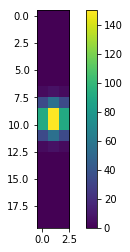

In [19]:
PHI1 = PHIa(10)
plt.imshow(PHI1)
plt.colorbar()

In [20]:
## Lateral connections in unisensory areas

# Parameters
Lt_ex = 0.15
Lt_in = 0.05
sigmat_ex = 1
sigmat_in = 4

La_ex = 0.15
La_in = 0.05
sigmaa_ex = 20
sigmaa_in = 80

# Tactile Connections
Lt = np.zeros((Mt*Nt,Mt*Nt))

for i in range(Mt*Nt):
    for j in range(Mt*Nt):
        if i==j: 
            Lt[i,j] = 0
        else:
            Dtx = xt[np.floor_divide(i,Nt)] - xt[np.floor_divide(j,Nt)]
            Dty = yt[np.remainder(i,Nt)-1] - yt[np.remainder(j,Nt)-1]
            Lt[i,j] = Lt_ex*np.exp(- (np.square(Dtx)+np.square(Dty))/(2*np.square(sigmat_ex)))-Lt_in*np.exp(- (np.square(Dtx)+np.square(Dty))/(2*np.square(sigmat_in)))

# Auditory Connections
La = np.zeros((Ma*Na,Ma*Na))

for i in range(Ma*Na):
    for j in range(Ma*Na):
        if i==j: 
            La[i,j] = 0
        else:
            Dax = xa[np.floor_divide(i,Na)] - xa[np.floor_divide(j,Na)]
            Day = ya[np.remainder(i,Na)-1] - ya[np.remainder(j,Na)-1]
            La[i,j] = La_ex*np.exp(- (np.square(Dax)+np.square(Day))/(2*np.square(sigmaa_ex)))-La_in*np.exp(- (np.square(Dax)+np.square(Day))/(2*np.square(sigmaa_in)))
            

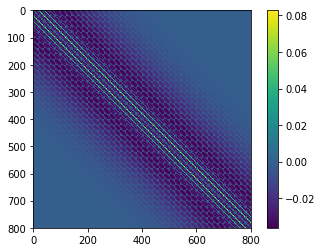

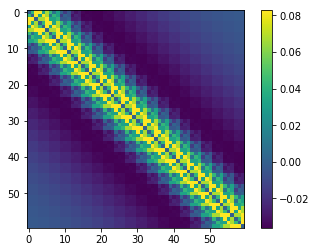

In [88]:
# Lateral inputs
def LIt(z):
    # z is a matrix of MtxNt dimensions
    LI = np.zeros((1,Mt*Nt))
    z = np.reshape(z,(1,Mt*Nt))
    for i in range(Mt*Nt):
            LI[0,i] = np.sum(Lt[i,:]*z[0,:]) 
    LI = np.reshape(LI,(Mt,Nt))
    return LI

def LIa(z):
    # z is a matrix of MtxNt dimensions
    LI = np.zeros((1,Ma*Na))
    z = np.reshape(z,(1,Ma*Na))
    for i in range(Ma*Na):
            LI[0,i] = np.sum(La[i,:]*z[0,:]) 
    LI = np.reshape(LI,(Ma,Na))
    return LI

plt.figure(1)
plt.imshow(Lt)
plt.colorbar()

plt.figure(2)
plt.imshow(La)
plt.colorbar()            

In [85]:
## Feedforward and feedback synapses

Wt_0 = 6.5
Wa_0 = 6.5

Bt_0 = 2.5
Ba_0 = 2.5

k1 = 10 #cm
k2 = 700 #cm
alpha = 0.9

# Tactile connections
Bt = np.ones((Mt,Nt))*Bt_0
Wt = np.ones((Mt,Nt))*Wt_0

# Auditory connections
Ba = np.zeros((Ma,Na))
Wa = np.zeros((Ma,Na))

for i in range(Ma):
    for j in range(Na):
        if (xa[i]<60) & (ya[j]<20): 
            D = 0
        else: 
            D = distance.euclidean((xa[i],ya[j]),(60,ya[j]))              
        Ba[i,j] = alpha*Ba_0*np.exp(- D/k1)+(1-alpha)*Ba_0*np.exp(- D/k2)
        Wa[i,j] = alpha*Wa_0*np.exp(- D/k1)+(1-alpha)*Wa_0*np.exp(- D/k2)

# Feedback inputs
def bt(z):
    #bt = np.zeros(Mt,Nt)
    bt = np.multiply(Bt,z)
    return bt

def ba(z):
    #bt = np.zeros(Mt,Nt)
    ba = np.multiply(Ba,z)
    return ba

# Plot feedforward and feedback weights
plt.figure(3)
plt.imshow(Ba)
plt.colorbar() 

plt.figure(4)
plt.imshow(Wa)
plt.colorbar() 

In [22]:
## Neuron activity in unisensory areas

ft_min = -0.12
ft_max = 1
qt_c = 19.43
rt = 0.34

fa_min = -0.12
fa_max = 1
qa_c = 19.43
ra = 0.34

tau = 20 #ms

def psit(qt):
    y = qt
    for i in range(Mt):
        for j in range(Nt):
            y[i,j] = (ft_min+ft_max*np.exp((qt[i,j]-qt_c)*rt))/(1+np.exp((qt[i,j]-qt_c)*rt))
    return y

def psia(qa):
    y = qa
    for i in range(Ma):
        for j in range(Na):
            y[i,j] = (fa_min+fa_max*np.exp((qa[i,j]-qa_c)*ra))/(1+np.exp((qa[i,j]-qa_c)*ra))
    return y





In [103]:
## Multisensory neuron activity

fm_min = 0
fm_max = 1
qm_c = 12
rm = 0.6

def psim(qm):
    y = (fm_min+fm_max*np.exp((qm-qm_c)*rm))/(1+np.exp((qm-qm_c)*rm))
    return y


In [116]:
# Simulation run
# Modify to run simulations at 0.4 time steps. Include stimulus change. 
# Double check stim functions (t0 is not correctly defined)

timesteps = 20 #ms
dt = 0.4 #ms

qt = np.zeros((Mt,Nt,timesteps+1))
ut = np.zeros((Mt,Nt,timesteps+1))
zt = np.zeros((Mt,Nt,timesteps+1))

qa = np.zeros((Ma,Na,timesteps+1))
ua = np.zeros((Ma,Na,timesteps+1))
za = np.zeros((Ma,Na,timesteps+1))

qm = np.zeros(timesteps+1)
um = np.zeros(timesteps+1)
zm = np.zeros(timesteps+1)

for i in range(timesteps):    
    # Tactile activity
    ut[:,:,i+1] = PHIt(i)+LIt(zt[:,:,i])+bt(zm[i])
    qt[:,:,i+1] = qt[:,:,i] + 1/tau*(-qt[:,:,i]+ut[:,:,i])
    pt = psit(qt[:,:,i])
    zt[:,:,i+1] = pt*np.heaviside(pt,0)
    
    # Auditory activity
    ua[:,:,i+1] = PHIa(i)+LIa(za[:,:,i])+ba(zm[i]) 
    qa[:,:,i+1] = qa[:,:,i] + 1/tau*(-qa[:,:,i]+ua[:,:,i])
    pa = psia(qa[:,:,i])
    za[:,:,i+1] = pa*np.heaviside(pa,0)
    
    # Multisensory activity
    um[i+1] = np.sum(np.multiply(Wt,zt[:,:,i])) + np.sum(np.multiply(Wa,za[:,:,i]))
    qm[i+1] = qm[i] + 1/tau*(-qm[i]+um[i])
    pm = psim(qm[i])
    zm[i+1] = pm*np.heaviside(pm,0)    


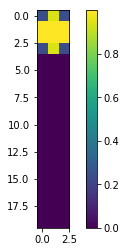

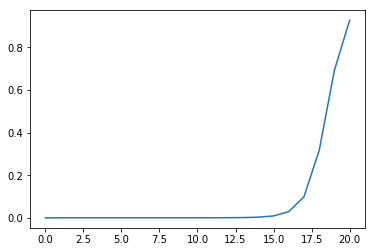

In [118]:
plt.figure(8)
plt.imshow(za[:,:,20])
plt.colorbar()

plt.figure(7)
plt.plot(zm)
#plt.figure(3)
#plt.imshow(pt)
#plt.colorbar()